# ML-2 Обучение с учителем. Регрессия
###  Содержание <a class="anchor" id=0></a>
- [1. Введение](#1)
- [2. Линейная регрессия. Аналитическое решение](#2)
- [2.1 Аналитическое решение с помощью NUMPY](#2-1)
- [2.1 Аналитическое решение с помощью SKLEARN](#2-2)
- [3. Метрики регрессии. Недостатки аналитического решения](#3)
- [4. Линейная регрессия. Численные решения](#4)
- [5. Дилемма смещения и разброса. Полигональные признаки. Регуляризация](#5)
- [6. Линейная регрессия. Практика](#6)
- [7. Итоги](#7)

# 1. Введение <a class="anchor" id=1></a>

[к содержанию](#0)

<img src=ml2_img1.png width=900>

В категории обучения с учителем модели можно условно разделить на следующие основные типы:

* **Линейные модели:** линейная регрессия (для задачи регрессии) и логистическая регрессия (для задачи классификации) и производные от них.
* **«Древесные» модели:** дерево решений и производные от него. 
* **Метрические алгоритмы:** метод ближайших соседей и производные от него.
* **Байесовские методы:** метод наивного Байеса и производные от него.
* **Ансамблевые методы:** композиции из методов (бэггинг, стекинг, бустинг).

В этом модуле мы поговорим о **линейных моделях** (но на самом деле ими не ограничимся), которые позволяют решать задачу регрессии.

>**Линейные модели** — это модели, отображающие зависимость целевого признака от факторов в виде линейной взаимосвязи.

<img src=ml2_img2.png width=900>

>На данном графике мы видим зависимость цены товара от его размера. Из диаграммы рассеяния видно, что в среднем точки расположены на одной прямой линии. То есть зависимость линейная.

Подкласс линейных моделей в свою очередь содержит множество конкретных моделей. В библиотеке `sklearn`, которую мы будем использовать, все линейные алгоритмы содержатся в модуле [linear_model](https://scikit-learn.ru/1-1-linear-models/). 

# 2. Линейная регрессия. Аналитическое решение <a class="anchor" id=2></a>

[к содержанию](#0)

`Регрессия` — это класс задач обучения с учителем, когда по определённому набору признаков объекта необходимо предсказать числовую целевую переменную.

`Цель обучения` — построить модель, которая бы отражала зависимость между признаками и целевой числовой переменной.

Когда зависимость принимается линейной, такая модель называется `линейной регрессией`.

## ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ЛИНЕЙНОЙ РЕГРЕССИИ

**Линейная регрессия** (`Linear Regression`) — одна из простейших моделей для решения задачи регрессии. Главная гипотеза состоит в том, что рассматриваемая зависимость является линейной.

Общий вид модели в случае, когда целевая переменная зависит от `m` факторов, будет иметь следующий вид:

<img src=ml2_img3.png>

Давайте разбираться, что в этом выражении значит каждая из переменных. Начнём с простого — с двумерного случая.

### 2D-СЛУЧАЙ

Для начала поговорим о самом простом случае, когда у нас есть один фактор и зависящий от него целевой признак. Геометрически такая зависимость представляет собой координатную плоскость, где мы отмечаем точки по оси `x` и соответствующие им точки на оси `y`.

>Рассмотрим задачу из нефтяной отрасли. Есть набор данных, где представлены данные о средней пористости скважин (в процентах) и добыче газа на этих скважинах в сутки (в миллионах кубических футов). 

Нам бы хотелось построить модель, которая опишет зависимость и позволит по известной пористости скважин предсказывать неизвестную выработку газа.

Зависимость целевого признака от фактора представлена на диаграмме рассеяния (см. ниже). Пористость скважины отложена по оси абсцисс — `Porosity (%)`, а добыча газа — по оси ординат, `Gas production (Mcf/day)`.

<img src=ml2_img4.png>

Из диаграммы отчётливо видно, что с ростом пористости скважины растёт добыча газа. Причём растёт она преимущественно линейно: основная масса точек находится на одной прямой.

>Идея! Давайте проведём через точки прямую линию так, чтобы она максимально хорошо описывала зависимость.

Для этого сначала вспомним уравнение прямой из школьного курса математики:

`y = kx + b`

где:

* `x` — это некоторый фактор, от которого зависит целевая переменная `y`. В нашем случае, `x` — это пористость скважины, а `y` — добыча газа.
* `k` — коэффициент наклона прямой (**тангенс угла наклона**). Если `k > 0`, это означает, что угол наклона прямой острый и прямая возрастает. Если `k < 0`, угол наклона тупой и прямая убывает.
* `b` — коэффициент смещения прямой по оси `y`. Он будет соответствовать значению `y` при `x = 0`. То есть это точка пересечения прямой и оси `Y`.

<img src=ml2_img5.png>

<img src=ml2_img6.png>

Это уравнение и есть двумерная модель линейной регрессии. Зная коэффициенты `k` и `b`, мы можем подставить в него любую пористость скважины `x` и получить предсказание добычи газа `y`.

Однако в машинном обучении приняты немного другие обозначения. Фактическое значение целевой переменной обозначается как `y`, а вот предсказанное моделью — `y^`. Также для удобства коэффициенты `k`и `b` приведём к единому обозначению: `w0 = k` и `w1 = b`. Тогда уравнение модели линейной регрессии запишется в виде:

<img src=ml2_img7.png>

>**Примечание. Коэффициенты `w0` и `w1` называются параметрами линейной регрессии**.

Остаётся только один вопрос: откуда, собственно, взять параметры `w0` и `w1`? Обсудим этот вопрос чуть позже.

А пока представим, что параметры мы нашли. В таком случае можно построить прямую, которая опишет нашу зависимость. Пусть коэффициенты составляют (мы их нашли сами по методу наименьших квадратов, о котором поговорим ниже):

`w0 = -2.94`

`w1 = 287.7`

Тогда модель будет иметь следующий вид:

`y^ = 287.7x - 2.94`

Если подставлять значения конкретные значения пористости `x` в модель, можно построить прямую, которая описывает исходную зависимость. Это и будет графическая интерпретация нашей модели:

<img src=ml2_img8.png>



### 3D-СЛУЧАЙ

Теперь представим, что у нас не один фактор, а два. Например, помимо пористости скважины, мы дополнительно знаем ещё и о её хрупкости в процентах. То есть у нас теперь есть два фактора: `x1` — пористость и `x2` — хрупкость.

Можно отобразить такую зависимость добычи газа от этих факторов в трёхмерном пространстве в виде диаграммы рассеяния:

<img src=ml2_img9.png>

В таком случае в выражение для модели добавится ещё одна переменная`x2` и соответствующий ей коэффициент `w2`:

Опять же, представим, что параметры модели мы нашли и они равны:

`w0 = -2003`

`w1 = 302.3`

`w1 = 31.38`

Тогда модель будет иметь следующий вид:

`y^ = 302.2x1 + 31.38x2 - 2003`

Это была алгебра — теперь перейдём к геометрии. Геометрически данное уравнение описывает плоскость в трёхмерном пространстве с осями `x1` и `x2`, `w0` — смещение плоскости по вертикальной оси, а коэффициенты `w1` и `w2` — коэффициенты наклона этой плоскости к осям `x1` и `x2`. 

То это это будет плоскость, которая подстроена под точки в трёхмерном пространстве:

<img src=ml2_img10.png>

## ОБЩИЙ СЛУЧАЙ

А что если факторов не два, а больше: 3, 15, 100? Тут-то мы и приходим к общему виду модели линейной регрессии, который вводили в самом начале. Пусть у нас есть `m` факторов `{x1, x2, ..., xm}`, от которых зависит целевая переменная `y`.

<img src=ml2_img11.png>

В геометрическом смысле данное уравнение описывает плоскость в `(m - 1)`-мерном пространстве (`m` факторов + `1` целевой признак отложены по осям координат). Такую плоскость называют **гиперплоскостью**.

Абстрактное `(m - 1)`-мерное пространство, конечно же, невозможно отобразить графически и сложно даже представить, как оно выглядит. Но нам это и не нужно. Все операции в таком пространстве аналогичны операциям в двумерном или трёхмерном пространстве.

>Для понимания принципа работы мы будем рассматривать только прямую в двумерном пространстве, а результат уже обобщать на случай с большей размерностью.

Стоит отметить, что в `DS` мы, как правило, работаем с большим количеством факторов (больше двух), которые описывают данные, поэтому отобразить модель в геометрическом пространстве не получится, но важно понимать, что представляет собой сама модель.

## ПОИСК ПАРАМЕТРОВ ЛИНЕЙНОЙ РЕГРЕССИИ: МЕТОД НАИМЕНЬШИХ КВАДРАТОВ

>Теперь мы знаем, как выглядит модель линейной регрессии в общем случае: это простое линейное выражение, подставляя в которое значения факторов, можно найти целевую переменную. Это линейное выражение соответствует прямой, плоскости или гиперплоскости в зависимости от количества признаков.

Остаётся вопрос: откуда взять коэффициенты, которые стоят при `x`?

Прямую же можно провести как угодно. Вот например несколько прямых, построенных с различными случайными коэффициентами:

<img src=ml2_img12.png>

Какие параметры будут наилучшими?

Для ответа на этот вопрос давайте вспомним схему обучения моделей машинного обучения по принципу минимизации эмпирического риска, которую мы рассматривали в предыдущем модуле:

<img src=ml2_img13.png width=900>

Согласно данной схеме обучения, поиск параметров производится путём минимизации некоторой **функции ошибки**. Математически мы пытаемся с помощью методов оптимизации найти такие параметры, чтобы ошибка была наименьшей из возможных.

Осталось только понять: **где взять эту функцию ошибки**? Ответ кроется в картинке ниже. Давайте представим, как могла бы выглядеть прямая в двумерном пространстве, проведённая, например, через пять точек:

<img src=ml2_img14.png>

>Что вообще есть **ошибка**? В самом простом понимании это расхождение между истиной и предсказанием.

Чтобы не учитывать знак расхождения, можно взять модуль разницы между истинным значением и предсказанным (тем, что лежит на прямой). Рассчитать ошибки  `e_i` (на рисунке они отмечены красными отрезками) для всех пяти точек можно следующим образом:

<img src=ml2_img15.png>

>Тут-то математики и столкнулись с проблемой. Оказывается, если пытаться решить эту оптимизационную задачу классическими способами (через условия экстремума функции), то поиск решения будет противоречить основным законам математического анализа. Почему? Обсудим это в модулях по математике, когда будем решать оптимизационные задачи.

<img src=ml2_img16.png>

Математике известно решение данной задачи оптимизации. Метод поиска параметров линейной регрессии называется методом наименьших квадратов (сокращённо — `МНК`) и был изобретён **Гауссом** ещё в **1795 году**. В английской литературе часто можно встретить аббревиатуру `OLS` (`Ordinary Least Squares`).

>Решать саму задачу поиска минимума функции мы сейчас не будем, так как пока что не владеем достаточными для её решения знаниями о частной производной и условиях экстремума функции многих переменных, но приведём финальный ответ, полученный для общего случая.

Итак, пусть у нас есть матрица `X`, в которой по строкам собрано `n` наблюдений, а по столбцам отложено `m` факторов — по сути, это обычный, привычный нам `DataFrame`. К каждому примеру из таблицы `X` есть ответ `y`.

Зависимость между факторами и целевым признаком принята линейной, то есть рассматривается обучение модели линейной регрессии:

<img src=ml2_img17.png>

Мы хотим найти наилучшую оценку для `w0`, `w1`, `w2`, ...m `w_m`.

>Примечание. Для того чтобы конечная запись формулы была короче и можно было включить в вектор `w-` коэффициент смещения прямой `w0`, в матрицу `X` первым добавляют столбец, полностью состоящий из единиц. Это связано со спецификой матричного умножения, о котором мы поговорим далее в курсе.

Согласно методу наименьших квадратов, аналитическое выражение для поиска вектора коэффициентов уравнения линейной регрессии имеет вид:

<img src=ml2_img18.png>

Саму процедуру обращения матриц мы будем рассматривать в модуле по линейной алгебре. Сейчас же для проведения этой операции мы будем использовать библиотеку numpy, которая позволяет очень быстро и просто обращать матрицы.

# АНАЛИТИЧЕСКОЕ РЕШЕНИЕ С ПОМОЩЬЮ NUMPY <a class="anchor" id=2-1></a>

[к содержанию](#0)

Перейдём к практической части. Давайте научимся строить аналитическое решение линейной регрессии по `МНК` в `Python`.

Вот какие этапы нам предстоит пройти, чтобы построить свою модель:

1. Загрузить данные и проанализировать датасет на предмет пропусков.
2. Подготовить данные для подачи в модель: избавиться от пропусков, если они есть, и перекодировать категориальные признаки, если они представлены текстом.
3. Построить модель. Будем строить несколько моделей линейной регрессии: первую — на одном признаке, вторую — на всех доступные признаках.
4. Оценить качество модели.

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
%matplotlib inline
plt.style.use('seaborn') #установка стиля matplotlib

Будем работать с датасетом из библиотеки `sklearn` о домах в Бостоне. Этот набор данных содержит информацию, собранную службой переписи населения США и касающуюся жилья в районе Бостона, штат Массачусетс.

Данный датасет содержится в модуле `datasets` библиотеки `sklearn`. Давайте загрузим датасет с помощью функции `load_boston()` и выведем его описание, обратившись по ключу `'DESCR'`:

In [2]:
from sklearn.datasets import load_boston 
boston = load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

c:\Users\AubakirovMA\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

В данном описании говорится, что у нас есть `506` участков с жилыми домами, которые описываются `13`-ю признаками. На каждом из участков находится несколько домов. Измерены общие показатели по каждому из участков, в том числе медианная стоимость.

Задача — научить модель предсказывать медианную стоимость дома на участке.

`CRIM` — уровень преступности на душу населения по городам.;
`ZN` — доля земли под жилую застройку, разделённая на участки площадью более 25 000 кв. футов;
`INDUS` — доля акров, которые принадлежат предприятиям, не связанным с розничной торговлей, на город;
`CHAS` — фиктивная переменная реки Чарльз (1 — если участок прилегает к реке; 0 — в противном случае);
`NOX` — концентрация оксидов азота (в десятимиллионных долях);
`RM` — среднее количество комнат в доме;
`AGE` —доля зданий, построенных до 1940 г. и занимаемых владельцами;
`DIS` — взвешенные расстояния до пяти бостонских центров занятости;
`RAD` — индекс доступности радиальных автомобильных дорог;
`TAX` — полная ставка налога на имущество за каждые 10 000 долларов стоимости;
`PTRATIO` — соотношение учеников и учителей по городам;
`B` — 1000 (`Bk` — 0.63) , где `Bk` — доля граждан афроамериканского происхождения по городам;
`LSTAT` — процент населения с низким статусом;
`MEDV` — медианное значение стоимости домов, занимаемых владельцами, в тысячах долларов США (целевой признак).

Составим `DataFrame` из наших данных. Для этого обратимся по ключу '`data`' к загруженным данным и получим numpy-массив, в котором содержится информация обо всех признаках, а по ключу '`feature_names`' содержатся названия признаков. Обратившись по ключу '`target`', можно получить numpy-вектор со значениями целевой переменной — медианной стоимости занимаемых домов (`MEDV`).

In [3]:
#создаём DataFrame из загруженных numpy-матриц
boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)
#добавляем в таблицу столбец с целевой переменной
boston_data['MEDV'] = boston.target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


>Примечание. Модель линейной регрессии требует, чтобы в подаваемых ей на вход данных не было пропущенных значений. Поэтому если в ваших данных окажутся пропуски, обязательно заранее позаботьтесь о них (способы мы изучали в модуле по очистке данных).

Итак, в наших данных нет пропусков, а значит их можно подавать в модель, чтобы обучить её предсказывать целевой признак (признак MEDV).

>Также модель не умеет работать с категориальными признаками, представленными в виде типа `object`. Прежде чем подавать в модель линейной регрессии категориальные признаки, необходимо произвести кодировку категорий с помощью уже знакомых вам методов кодирования.

Давайте начнём с простого. Построим линейную регрессию на одном признаке. Выберем признак, который имеет наиболее высокую линейную взаимосвязь. Для этого рассчитаем корреляцию признаков с целевой переменной и выберем наиболее влиятельный.

Для лучшего восприятия давайте построим столбчатую диаграмму для модульного значения корреляций:

>Примечание. Мы могли визуализировать матрицу корреляций, однако сейчас нас интересует только связь факторов с целевым признаком, поэтому нагляднее будет воспользоваться столбчатой диаграммой.

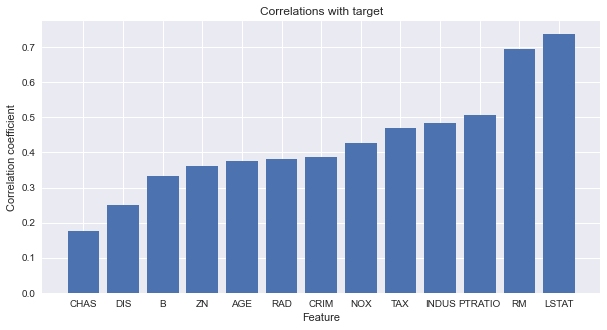

In [9]:
#Вычисляем модуль корреляции
corr_with_target = boston_data.corr()['MEDV'].abs().sort_values()
#Удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('MEDV')
#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(10, 5)) #фигура+координатная плоскость
ax.bar(corr_with_target.index, corr_with_target.values) #столбчатая диаграмма
ax.set_title('Correlations with target') #название графика
ax.set_xlabel('Feature') #название оси x
ax.set_ylabel('Сorrelation coefficient'); #название оси y

Итак, самый коррелированный по модулю с медианной ценой (MEDV) признак — процент населения с низким статусом (LSTAT). Давайте построим линейную регрессию, используя этот признак.

>Примечание. Построить линейную регрессию = обучить линейную регрессию = найти её параметры.

Вспоминаем нашу формулу аналитического решения по методу наименьших квадратов:

<img src=ml2_img19.png>

Что есть `X` и `y`? Это матрица из примеров (матрица наблюдений) и вектор правильных ответов к ним соответственно. У нас матрица `X` — это таблица, состоящая из одного столбца (`LSTAT`), а `y` — столбец с медианными ценами (`MEDV`):

In [20]:
X = boston_data[['LSTAT']] #матрица наблюдений
y = boston_data['MEDV'] #вектор правильных ответов
X.head()
#y.head()

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


>Примечание. Двойные квадратные скобки `boston_data[['LSTAT']]` позволяют выбрать признак из `DataFrame`, сохранив его в виде таблицы. Это важно, так как в формуле `МНК`  — это матрица.

У нас есть все компоненты формулы, чтобы найти параметры модели. Давайте напишем функцию `linear_regression()`, в которой реализуем вычисления коэффициентов. Аргументами функции будут матрица наблюдений `X` и вектор ответов `y`, а возвращать она будет вектор параметров `w`.

Матричные вычисления легче всего реализовать через библиотеку `numpy`.

Для начала вспомним, что для вычисления свободного члена `w0` необходимо добавить в таблицу столбец, полностью состоящий из единиц. Такой столбец можно создать с помощью знакомой нам функции [ones()](https://numpy.org/doc/stable/reference/generated/numpy.ones.html) из библиотеки `numpy`, а присоединить его к таблице `X` поможет функция [column_stack()](https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html).

Матричное умножение в numpy реализуется с помощью оператора `@`. Транспонирование осуществляется через `.T`, а обратная матрица вычисляется с помощью функции [inv()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) из модуля `linalg` (модуля для линейной алгебры).

In [42]:
def linear_regression(X, y):
    #Создаём вектор из единиц
    ones = np.ones(X.shape[0])
    #Добавляем вектор к таблице первым столбцом
    X = np.column_stack([ones, X])
    #Вычисляем обратную матрицу Q
    Q = np.linalg.inv(X.T @ X)
    #Вычисляем вектор коэффициентов
    w = Q @ X.T @ y
    return w

Осталось только вызвать нашу функцию и передать в неё нашу таблицу примеров `X` и столбец правильных ответов `y`. Вычислим вектор параметров и выведем его на экран:

In [16]:
#Вычисляем параметры линейной регрессии
w = linear_regression(X, y)
#Выводим вычисленные значения параметров в виде вектора
print('Vector w: {}'.format(w))
#Выводим параметры с точностью до двух знаков после запятой
print('w0: {:.2f}'.format(w[0]))
print('w1: {:.2f}'.format(w[1]))
# Vector w: [34.55384088 -0.95004935]
# w0: 34.55
# w1: -0.95

Vector w: [34.55384088 -0.95004935]
w0: 34.55
w1: -0.95


Итак, мы получили значения коэффициентов уравнения прямой. С точностью до сотых они равны:

`w0 = 34.55`

`w1 = -0.95`

А значит сама модель будет иметь вид:

`y = 34.55 - 0.95x1`

Самое приятное в модели линейной регрессии — то, что её коэффициенты можно проинтерпретировать. 

Коэффициент `w0 = 34.55` имитирует влияние сторонних факторов, которые не учтены в модели. Это значение медианной цены домов на участке, если бы значение процента населения с низким статусом было равно `0`. 

Коэффициент `w1 = -0.95` означает, на сколько в среднем изменится медианная цена (в тысячах долларов) при увеличении низкостатусного населения на 1 единицу. То есть если количество низкостатусного населения увеличится на `1 %`, то медианная цена зданий на участке упадёт на `0.95` тысяч долларов. Можно сказать, что каждый новый процент низкостатусного населения уменьшает медианную цену на `0.95` тысяч долларов.

Теперь, если в данных появится новый участок Бостона с известной долей низкостатусного населения, мы сможем предсказать значение медианной стоимости домов простой подстановкой значений в модель:

In [21]:
#Задаём процент низкостатусного населения
x_example = 5.18 
#Делаем предсказание
y_predict = w[0] + w[1] * x_example
print('Predicted value: {:.2f}'.format(float(y_predict)))
#Predicted value: 29.63

Predicted value: 29.63


Так как мы работаем с одним фактором, то можем построить визуализацию нашей модели.

Давайте напишем функцию `plot_regression_2d()`, у которой будет три обязательных аргумента (матрица наблюдений `X`, столбец правильных ответов `y` и столбец с предсказаниями модели `y_pred`) и два аргумента по умолчанию (`xlabel` — подпись оси абсцисс и `ylabel` — подпись оси ординат).

In [23]:
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8, 4)) #фигура + координатная плоскость
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') #диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') #линейный график
    ax.set_xlabel(xlabel) #название оси абсцисс
    ax.set_ylabel(ylabel) #название оси ординат
    ax.legend(facecolor='white', fontsize=11) #легенда

Сделаем предсказание для всех объектов из таблицы `X`, подставив её в модель линейной регрессии с найденными параметрами, и построим график:

InvalidIndexError: (slice(None, None, None), None)

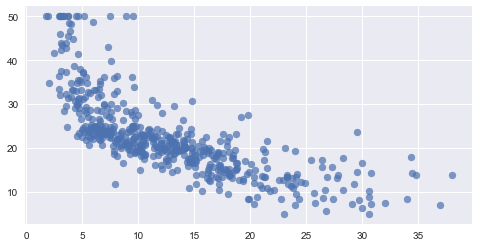

In [24]:
#Делаем предсказание для всех объектов из таблицы
y_predict = w[0] + w[1] * X
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

Как и ожидалось, прямая является убывающей (коэффициент `w1 < 0`), и, если её продолжить влево, она пересечётся с осью ординат в точке `w0 = 34.55`. 

>Итак, мы воспользовались формулой для МНК алгоритма и нашли параметры модели линейной регрессии «вручную», реализовав формулу в виде функции. Отметим, что наша функция универсальна: в неё можно подавать не только матрицу  с одним признаком (LSTAT), но и таблицу, содержащую все признаки, описывающие участки.
>
>Конечно же, никто не строит линейную регрессию «руками», используя формулу МНК. Все дата-сайентисты пользуются библиотеками, такими как sklearn. Давайте посмотрим на реализацию ↓

# АНАЛИТИЧЕСКОЕ РЕШЕНИЕ С ПОМОЩЬЮ SKLEARN <a class="anchor" id=2-2></a>

[к содержанию](#0)

Алгоритм построения модели реализован в библиотеке машинного обучения `sklearn` и находится в модуле `linear_model`. Давайте импортируем этот модуль:

In [25]:
from sklearn import linear_model

В модуле находится класс [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), который реализует аналитическое решение линейной регрессии. Для обучения модели необходимо просто вызвать метод `fit()`, передав в него матрицу наблюдений `X` и вектор правильных ответов `y`.

Данный метод реализует формулу **метода наименьших квадратов** и рассчитает параметры модели самостоятельно. Чтобы получить свободный член `w0` нужно обратиться по атрибуту `intercept_`, а вектор параметров `w1, w2, ..., w_m` будет храниться в атрибуте `coef_` (так как у нас один фактор в матрице `X`, то и коэффициент будет только один):

In [26]:
#Создаём объект класса LinearRegression
lr_lstat = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_lstat.fit(X, y)
 
print('w0: {}'.format(lr_lstat.intercept_)) #свободный член w0
print('w1: {}'.format(lr_lstat.coef_)) #остальные параметры модели w1, w2, ..., wm
 
# w0: 34.55384087938311
# w1: [-0.95004935]

w0: 34.55384087938311
w1: [-0.95004935]


>Примечание. Обратите внимание, что мы получили ровно те же самые значения для параметров модели, что является вполне ожидаемым, ведь метод `fit()` у объекта `LinearRegression` реализует ту же самую формулу `МНК`, которую мы прописали в функции `linear_regression()`. Интерпретация коэффициентов остаётся той же.

Модель обучена. А как сделать предсказание? Вручную записывать выражение для модели и подставлять коэффициенты? Конечно же, нет. Для этого есть метод `predict()`. В него необходимо передать матрицу наблюдений, для которых нужно сделать предсказание.

Давайте сделаем предсказание для всех наших наблюдений из таблицы `X` и визуализируем результат с помощью нашей функции `plot_regression_2d()`:

InvalidIndexError: (slice(None, None, None), None)

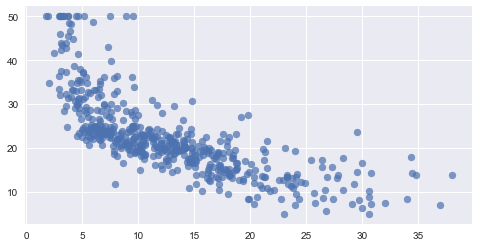

In [27]:
#Предсказываем медианную цену для всех участков из набора данных
y_predict = lr_lstat.predict(X)
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

Получаем тот же самый график, что мы видели ранее, когда реализовывали линейную регрессию вручную.

А что, если мы хотим построить линейную регрессию, используя всю предоставленную информацию, то есть все `13` признаков? Не проблема! Нужно только расширить матрицу наблюдений `X`, добавив в неё остальные признаки и снова обучить модель `LinearRegression`.

Давайте выберем из таблицы `boston` все столбцы, исключая столбец с целевой переменной (`MEDV`). Полученную матрицу `X` и вектор правильных ответов y отправляем в метод `fit()`, чтобы произвести подгонку и найти параметры модели.

In [30]:
#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']
#Создаём объект класса LinearRegression
lr_full = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_full.fit(X, y)

LinearRegression()

In [29]:
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': lr_full .coef_})
#Составляем строку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': lr_full .intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


Итак, мы получили таблицу с признаками из нашего набора данных и коэффициентами, которые им соответствуют.

Каждый из коэффициентов в модели показывает, на сколько в среднем (согласно модели) изменится медианная цена (в тысячах долларов) при увеличении параметра на единицу. Например, если уровень преступности увеличится на один пункт, то медианная цена зданий на участке упадёт на 0.1 тыс. долларов. А вот увеличение среднего количества комнат на участке (RM) на одну единицу повысит медианную цену на 3.8 тыс. долларов.

>Свободный член (`INTERCEPT`) всё так же имитирует влияние внешних факторов и носит смысл «поправки» модели относительно медианной стоимости.

Итак, мы с вами построили две модели линейной регрессии: `lr_lstat` на одном признаке (`LSTAT`) и `lr_full` — на всех признаках в данных. Хотелось бы сравнить эти модели по их качеству. Может, нам достаточно только знаний о проценте низкостатусного населения, чтобы предсказать медианную цену?

Самая простая идея — визуализировать ошибки. Давайте построим коробчатые диаграммы ошибок моделей. Ошибки будем считать по формуле:

`error_i = y_i - y^`

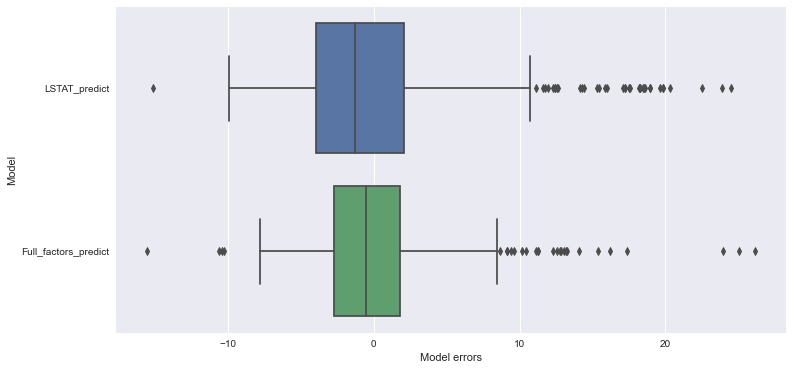

In [31]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура + координатная плоскость
#Ошибки модели на одном факторе LSTAT
y_errors_lstat = y - lr_lstat.predict(boston_data[['LSTAT']])
#Ошибки модели на всех факторах
y_errors_full = y - lr_full.predict(boston_data[features])
#Для удобства визуализации составим DataFrame из ошибок
errors_df = pd.DataFrame(
    {'LSTAT_predict': y_errors_lstat, 
     'Full_factors_predict': y_errors_full
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

Из построенных диаграмм ошибок видно, что разброс ошибок для модели, построенной на всех признаках, ниже (ящик уже и усы короче), и медиана ошибки также более приближена к `0`. То есть можно сказать, что **визуально качество второй модели выглядит лучше**.

На обеих диаграммах присутствуют точки, сильно выбивающиеся за пределы усов. Это наблюдения, для которых модель допустила очень большую ошибку, по сравнению с основной группой.

Можно предположить, что это объекты, для которых гипотеза о линейной зависимости несправедлива, и линейной модели не хватает для предсказания целевой переменной для таких объектов. О том, как справиться с этой проблемой, мы поговорим чуть позже.

Визуализация — это, конечно, хорошо, но, согласитесь, не очень удобно: визуализация не даёт конкретики — только общие представления об ошибках.

Может быть, есть способ описать качество модели каким-то конкретным числом? Да. Этот показатель называется **`метрикой`**. 

In [34]:
# Новые данные
new_data = pd.DataFrame({'CRIM':[0.35114],
                         'ZN':[0.00000],
                         'INDUS':[7.38000],
                         'CHAS':[0.00000],
                         'NOX':[0.49300],
                         'RM':[6.04100],
                         'AGE':[49.90000],
                         'DIS':[4.72110],
                         'RAD':[5.00000],
                         'TAX':[287.00000],
                         'PTRATIO':[19.60000],
                         'B':[396.90000],
                         'LSTAT':[7.70000]})
new_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.35114,0.0,7.38,0.0,0.493,6.041,49.9,4.7211,5.0,287.0,19.6,396.9,7.7


In [39]:
# Предсказания по новым данным
lr_full.predict(new_data)

array([22.86952447])

In [75]:
data = pd.read_csv('50_Startups.zip')

def linear_regression(X, y):
    #Создаём вектор из единиц
    ones = np.ones(X.shape[0])
    #Добавляем вектор к таблице первым столбцом
    X = np.column_stack([ones, X])
    #Вычисляем обратную матрицу Q
    Q = np.linalg.inv(X.T @ X)
    #Вычисляем вектор коэффициентов
    w = Q @ X.T @ y
    return w

w = linear_regression(data.drop(['State', 'Profit'], axis=1), data['Profit'])
coef = pd.DataFrame(w, index=list(data.drop(['State', 'Profit'], axis=1).columns.insert(0, 'w0')))
coef

,0
w0,50122.192990
R&D Spend,0.805715
Administration,-0.026816
Marketing Spend,0.027228


# 3. Метрики регрессии. Недостатки аналитического решения <a class="anchor" id=3></a>

[к содержанию](#0)

# 4. Линейная регрессия. Числовые решения <a class="anchor" id=4></a>

[к содержанию](#0)

# 5. Дилемма смещения и разброса. Полигональные признаки. Регуляризация <a class="anchor" id=5></a>

[к содержанию](#0)

# 6. Линейная регрессия. Практика <a class="anchor" id=6></a>

[к содержанию](#0)

# 7. Итоги <a class="anchor" id=7></a>

[к содержанию](#0)